In [4]:
import numpy as np
import matplotlib.pyplot as plt

op = 'C:\\Users\\erick\\Documents\\Projects\\IEAv\\Programs\\jupyter\\Project_LIDAR\\image\\JAX_214_interp_Z.npy'
im = np.load(op)
print('data:\n', im[0:20, 0:9])

data:
 [[ 8.775  8.775  8.755  8.72   8.665  8.63   8.525  8.475  8.46 ]
 [ 8.82   8.755  8.755  8.69  -0.08   8.59   8.505  8.45   9.045]
 [ 8.71   8.73   8.675  8.63   8.625  8.53   8.5    8.455  8.375]
 [ 8.82   8.72   8.675  8.59   8.555  8.515  8.45   8.395  8.28 ]
 [ 8.7    8.665  8.615  8.605  8.555  8.435  8.46   8.335  0.29 ]
 [ 8.69   8.64   8.625  8.57   8.48   8.41   8.39  -8.59   0.29 ]
 [ 8.69   8.615  8.565  8.49   8.5    8.39   8.395  8.395  8.295]
 [ 8.59   8.565  8.545  8.51   8.445  8.355  8.315  8.235  8.245]
 [ 8.62   8.565  8.525  8.475  8.425  8.425  8.35   8.305  8.245]
 [ 8.565  8.515  8.445  8.43   8.355  8.305  8.29   8.185  8.345]
 [ 8.56   8.47   8.43   8.43   8.355  8.305  8.29   8.185  8.345]
 [ 8.49   8.45   8.42   8.35   8.325  8.25   8.215  8.205  0.44 ]
 [ 8.475  8.44   8.325  8.325 -8.7    8.21   8.13   8.605  8.605]
 [ 8.425  8.39   8.345  8.305  8.24   8.21   8.13   0.465 -7.515]
 [ 8.395  8.375  8.34   8.24   8.19   0.22   8.205  8.025 -7.575]
 [ 

In [5]:
%run rot_matriz.ipynb
%run r_squared.ipynb

import sys
from tqdm import tqdm

def img_elv(data, tm, erro):
    t, rqx = 0, []
    im2 = np.zeros(data.shape)

    for i in tqdm(range(0, len(data)-tm)):
        for j in range(0, len(data)-tm):
            im = data[i: i+tm, j:j+tm]
            ang = (tm ** 2 - ((tm - 1) ** 2)) - 1

            for k in range(0, 180, 45):
                x, y, sel = rot(im, k, erro, [i, j])
                ind = np.linspace(0, (len(sel) - 1) + j, num=len(sel))
                rqx = rsquared(ind, sel)

                if rqx >= 0.9:
                    for l in range(0, len(sel)):
                        im2[x[l], y[l]] = 1
                    t += 1
                else:
                    for l in range(0, len(sel)):
                        if im2[x[l], y[l]] == 1:
                            im2[x[l], y[l]] = 1
                        else:
                            im2[x[l], y[l]] = 0
                    t += 1
    return im2

100%|████████████████████████████████████████████████████████████████████████████████| 193/193 [00:40<00:00,  4.79it/s]


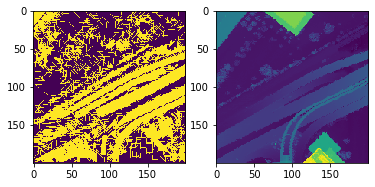

In [6]:
tm = 7
im = im[300:500, 300:500]

im2 = img_elv(im, tm, 0.5)

sub = 121
plt.subplot(sub)
plt.imshow(im2)
plt.subplot(sub+1)
plt.imshow(im)
plt.show()